<a href="https://colab.research.google.com/github/ancestor9/Affalatoxin-Analysis/blob/main/prediction/0910_%EC%95%84%ED%94%8C%EB%9D%BC%ED%86%A1%EC%8B%A0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%A1%B0%EC%83%81%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd

def summarize(df):
    summary = pd.DataFrame(index=df.columns)
    summary['Data Type'] = df.dtypes
    summary['Unique Values'] = df.nunique()
    summary['Missing Values (%)'] = (df.isnull().sum() / len(df)) * 100

    # Get sample values, up to 10
    def get_sample_values(series):
        non_null_values = series.dropna().unique()
        if len(non_null_values) > 10:
            return non_null_values[:10].tolist()
        else:
            return non_null_values.tolist()

    # Collect sample values for each column
    sample_values_list = [get_sample_values(df[col]) for col in df.columns]
    summary['Sample Values'] = sample_values_list

    return summary

In [19]:
import pandas as pd

def summarize(df):
    summary = pd.DataFrame(index=df.columns)
    summary['Data Type'] = df.dtypes
    summary['Unique Values'] = df.nunique()
    summary['Missing Values (%)'] = (df.isnull().sum() / len(df)) * 100

    # Get sample values, up to 10
    def get_sample_values(series):
        non_null_values = series.dropna().unique()
        if len(non_null_values) > 10:
            return non_null_values[:10].tolist()
        else:
            return non_null_values.tolist()

    # Collect sample values for each column
    sample_values_list = [get_sample_values(df[col]) for col in df.columns]
    summary['Sample Values'] = sample_values_list

    return summary

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1단계: 데이터 로드 ---
X_df = pd.read_pickle('/content/drive/MyDrive/식약처/df_통합_LIMS_기상정보_결합_gzip_X.pkl', compression='gzip')
y_df = pd.read_pickle('/content/drive/MyDrive/식약처/df_통합_LIMS_기상정보_결합_gzip_y.pkl', compression='gzip')

In [21]:
summarize(y_df)

,Data Type,Unique Values,Missing Values (%),Sample Values
JDGMNT_WORD_NAME,object,3,0.0,"[적합, 부적합, 상기실험확인함]"
결과,object,2,0.0,"[불검출, 수치]"
결과값,object,2245,0.0,"[0, 24.34, 22.61, 0.0, 0.006, 2.0907, 0.4864, ..."


In [22]:
y_df['결과값'] = y_df['결과값'].astype(str)

In [23]:
numeric_converted = pd.to_numeric(y_df['결과값'], errors='coerce')
non_numeric_mask = y_df['결과값'].notna() & numeric_converted.isna()
non_numeric_values = y_df['결과값'][non_numeric_mask]

print("실수형태가 아닌 값들:")
print(non_numeric_values)
print(f"개수: {len(non_numeric_values)}")

실수형태가 아닌 값들:
142013    0..003
Name: 결과값, dtype: object
개수: 1


In [25]:
# Replace '0..003' with '0.003' in the '결과값' column
y_df['결과값'] = y_df['결과값'].replace('0..003', '0.003')

# Convert the '결과값' column to numeric, coercing errors to NaN
y_df['결과값_numeric'] = pd.to_numeric(y_df['결과값'], errors='coerce')

# You might want to check if there are any new non-numeric values after the replacement and conversion
non_numeric_mask_after = y_df['결과값'].notna() & y_df['결과값_numeric'].isna()
non_numeric_values_after = y_df['결과값'][non_numeric_mask_after]

print("실수형태가 아닌 값들 (변경 및 변환 후):")
print(non_numeric_values_after)
print(f"개수: {len(non_numeric_values_after)}")

실수형태가 아닌 값들 (변경 및 변환 후):
Series([], Name: 결과값, dtype: object)
개수: 0


In [26]:
summarize(y_df)

,Data Type,Unique Values,Missing Values (%),Sample Values
JDGMNT_WORD_NAME,object,3,0.0,"[적합, 부적합, 상기실험확인함]"
결과,object,2,0.0,"[불검출, 수치]"
결과값,object,2243,0.0,"[0, 24.34, 22.61, 0.0, 0.006, 2.0907, 0.4864, ..."
결과값_numeric,float64,2103,0.0,"[0.0, 24.34, 22.61, 0.006, 2.0907, 0.4864, 0.9..."


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


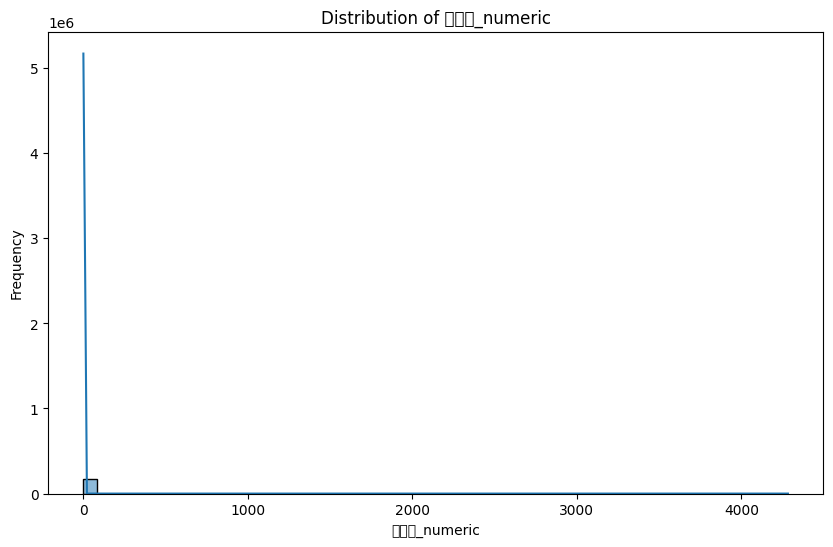

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the '결과값_numeric' column
plt.figure(figsize=(10, 6))
sns.histplot(y_df['결과값_numeric'].dropna(), bins=50, kde=True)
plt.title('Distribution of 결과값_numeric')
plt.xlabel('결과값_numeric')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


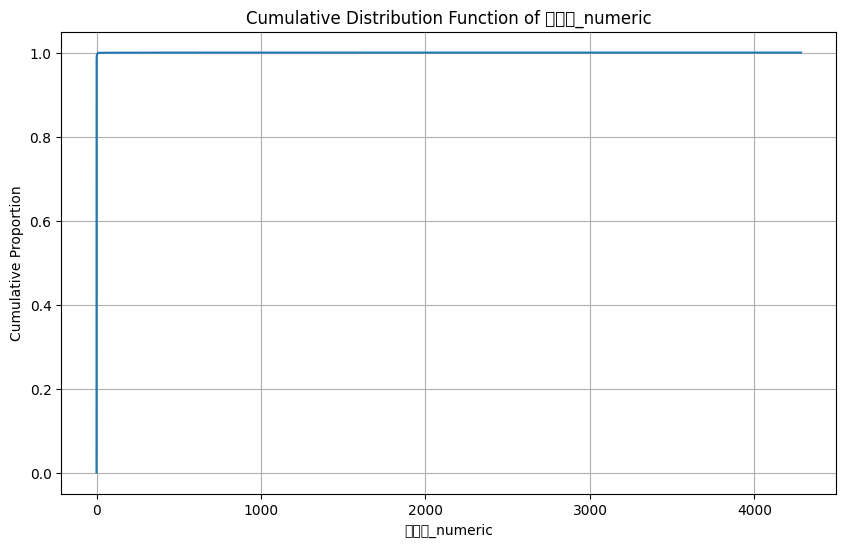

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop NaN values from the '결과값_numeric' column
data = y_df['결과값_numeric'].dropna()

# Sort the data
sorted_data = np.sort(data)

# Calculate the cumulative distribution function (CDF)
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, cdf)
plt.title('Cumulative Distribution Function of 결과값_numeric')
plt.xlabel('결과값_numeric')
plt.ylabel('Cumulative Proportion')
plt.grid(True)
plt.show()

In [32]:
# Calculate the value at the 30th percentile (cumulative proportion of 0.3)

for i in range(10):
    value_at_30_percentile = y_df['결과값_numeric'].quantile(i/10)
    print(f"The value at the {i*10}% percentile is: {value_at_30_percentile}")

print(f"The value at which the cumulative proportion is 30% is: {value_at_30_percentile}")

The value at the 0% percentile is: 0.0
The value at the 10% percentile is: 0.0
The value at the 20% percentile is: 0.0
The value at the 30% percentile is: 0.0
The value at the 40% percentile is: 0.0
The value at the 50% percentile is: 0.0
The value at the 60% percentile is: 0.0
The value at the 70% percentile is: 0.0
The value at the 80% percentile is: 0.0
The value at the 90% percentile is: 0.0
The value at which the cumulative proportion is 30% is: 0.0


In [51]:
# Filter the DataFrame to get values greater than or equal to 15
count_greater_than_15 = y_df[y_df['결과값_numeric'] >= 0.0000001].shape[0]

# Calculate the total number of values in the column (excluding NaNs if necessary, though previous steps handled NaNs)
total_count = y_df['결과값_numeric'].shape[0]

# Calculate the percentage
percentage_greater_than_15 = (count_greater_than_15 / total_count) * 100

print(f"The percentage of values in '결과값_numeric' that are 15 or greater is: {percentage_greater_than_15:.2f}%")

The percentage of values in '결과값_numeric' that are 15 or greater is: 6.82%
